# **PROJET INFORMATIQUE 3**

# Prédiction de maladies cardiaque

Robin LANG et Laurette Stephanus

**Objectif du projet**

Ce projet a pour objectif de prédire la présence d’une maladie cardiaque chez un patient à partir de données cliniques simples, telles que l’âge, la tension artérielle, le cholestérol ou encore les résultats d’examens médicaux.  
Il s’agit d’un problème de classification binaire où la variable cible "maladie_cœur" prend la valeur :
- 1 = Présence d’une maladie cardiaque,  
- 0 = Absence de maladie cardiaque.

L’objectif final est de comparer plusieurs modèles de machine learning afin d’identifier celui qui offre les meilleures performances pour cette tâche prédictive.

**Contexte**

Les maladies cardiovasculaires représentent aujourd’hui l’une des principales causes de mortalité dans le monde.  
L’analyse automatique de données médicales permet de détecter précocement les patients à risque, d’aider à la décision médicale, et de réduire la charge de diagnostic dans les hôpitaux.

Le dataset utilisé est un jeu de données classique de la littérature, contenant 303 observations et 14 variables décrivant l’état de santé des patients :
- Âge, sexe, tension artérielle, cholestérol, fréquence cardiaque, type de douleur thoracique, etc.  
- La variable cible "maladie_cœur" indique la présence (1) ou non (0) d’un problème cardiaque.

**Méthodologie**

Le projet suit la démarche habituelle d’un pipeline de machine learning :
1. Import des bibliothèques (pandas, numpy, seaborn, matplotlib, scikit-learn, xgboost et shap),
2. Chargement du dataset "heart.csv",
3. Analyse du type de données,
4. Nettoyage et gestion des valeurs manquantes ,
5. Analyse exploratoire (EDA) pour comprendre les tendances du jeu de données,  
6. Préparation des données pour l’apprentissage (séparation train/test, standardisation, encodage),
7. Entraînement et évaluation de plusieurs modèles de classification :
   Régression Logistique, KNN, Arbre de Décision, Forêt Aléatoire,
8. Comparaison des performances selon plusieurs métriques (accuracy, précision, rappel, F1-score),  
9. Optimisation des hyperparamètres (GridSearchCV),
10. Validation croisée (K-Fold) pour mesurer la robustesse et la capacité de généralisation du modèle,
11. Explicabilité du modèle (Permutation Importance, Analyse SHAP),  
12. Synthèse et interprétation finale.

**Résultats attendus**

À l’issue du projet, nous obtiendrons :
- Un modèle de classification performant pour la détection de maladies cardiaques,  
- Une analyse complète du comportement de chaque modèle,  
- Des pistes d’amélioration pour des approches plus avancées (boosting, réseaux de neurones, explicabilité).


"Les maladies cardiaques, également appelées maladies cardiovasculaires, constituent un terme générique désignant les affections et troubles qui touchent le cœur et le système circulatoire. Elles représentent l’une des principales causes d’invalidité dans le monde. Comme le cœur est l’un des organes les plus vitaux du corps humain, ses maladies ont également un impact sur d’autres organes et parties du corps.
Il existe plusieurs types et formes de maladies cardiaques. Les plus courantes provoquent un rétrécissement ou une obstruction des artères coronaires, un dysfonctionnement des valves cardiaques, une dilatation du cœur, ainsi que d’autres anomalies pouvant conduire à une **insuffisance cardiaque** ou à une **crise cardiaque**".

## Étape 1 - Import et installation des bibliothèques

Tout d'abord, nous installons les bibliothèques manquantes.

In [3]:
pip install matplotlib seaborn scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


Ensuite, nous importons toutes les bilbiothèques utiles à notre étude :
- Pandas : manipulation des données
- NumPy : calcul matriciel
- Matplotlib & Seaborn : visualisation
- Scikit-learn : prétraitement et modèles de ML
- XGBoost, LightGBM, CatBoost : modèles de boosting (avancé)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

print("Bibliothèques importées avec succès !")

Bibliothèques importées avec succès !


## Étape 2 - Import du dataset

Nous allons importer le fichier "heart.csv" qui contient les données cliniques de 303 patients.

Chaque ligne correspond à un patient, et chaque colonne à une caractéristique de symptome.

In [5]:
df = pd.read_csv("heart.csv")

print("Données chargées avec succès !")
print("Dimensions du dataset :", df.shape)
df.head()

Données chargées avec succès !
Dimensions du dataset : (303, 14)


,âge,sexe,type_douleur_poitrine,tension_repos,cholestérol,glycémie_jeune,électrocardiogramme_repos,fréquence_cardiaque_max,angine_exercice,dépression_ST_exercice,pente_ST,vaisseaux_colorés,thal,maladie_cœur
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Étape 3 - Type de données

Puis, nous analysons le type de données.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   âge                        303 non-null    int64  
 1   sexe                       303 non-null    int64  
 2   type_douleur_poitrine      303 non-null    int64  
 3   tension_repos              303 non-null    int64  
 4   cholestérol                303 non-null    int64  
 5   glycémie_jeune             303 non-null    int64  
 6   électrocardiogramme_repos  303 non-null    int64  
 7   fréquence_cardiaque_max    303 non-null    int64  
 8   angine_exercice            303 non-null    int64  
 9   dépression_ST_exercice     303 non-null    float64
 10  pente_ST                   303 non-null    int64  
 11  vaisseaux_colorés          303 non-null    int64  
 12  thal                       303 non-null    int64  
 13  maladie_cœur               303 non-null    int64  

Voici ce que nous savons :

**Dictionnaire des données :**

- Age : Age du patient (en années)
- Sexe : Sexe du patient
    - 1 = Homme
    - 0 = Femme
- Type_douleur_poitrine : Type de douleur thoracique
    - 0 = Angine typique
    - 1 = Angine atypique
    - 2 = Douleur non angineuse
    - 3 = Asymptomatique
- Tension_repos : Tension artérielle au repos (en mm Hg à l’admission à l’hôpital)
- Cholestérol : Taux de cholestérol sérique (en mg/dl)
- Glycémie_jeune : Glycémie à jeun (> 120 mg/dl)
    - 1 = Vrai
    - 0 = Faux
- Électrocardiogramme_repos : Résultats de l’électrocardiogramme au repos
    - 0 = Normal
    - 1 = Anomalies de l’onde ST-T (inversion de l’onde T et/ou élévation ou dépression du segment ST > 0,05 mV)
    - 2 = Hypertrophie ventriculaire gauche probable ou certaine (critères d’Estes)
- Fréquence_cardiaque_max : Fréquence cardiaque maximale atteinte à l’effort
- Angine_exercice : Angine de poitrine provoquée par l’effort
    - 1 = Oui
    - 0 = Non
- Dépression_ST_exercice : Dépression du segment ST induite par l’effort par rapport au repos
- Pente_ST : Pente du segment ST lors de l’effort maximal
    - 0 = Montante
    - 1 = Plate
    - 2 = Descendante
- Vaisseaux_colorés : Nombre de vaisseaux majeurs (0 à 3) colorés par fluoroscopie
- Thal : Résultat du test au thallium
    - 0 = Erreur/ Valeur manquante
    - 1 = Défaut fixe
    - 2 = Normal
    - 3 = Défaut réversible
- Maladie_cœur (étiquette cible) : Présence d’une maladie cardiaque
    - 0 = Pas de maladie
    - 1 = Maladie détectée

In [7]:
print("\nValeurs uniques dans chaque colonne :")
for col in df.columns:
    uniques = df[col].unique()
    print(f"\n{col} ({len(uniques)} valeurs uniques) :")
    print(uniques)



Valeurs uniques dans chaque colonne :

âge (41 valeurs uniques) :
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

sexe (2 valeurs uniques) :
[1 0]

type_douleur_poitrine (4 valeurs uniques) :
[3 2 1 0]

tension_repos (49 valeurs uniques) :
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

cholestérol (152 valeurs uniques) :
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 

Nous obtenons :
- Vaisseaux_colorés : [0 2 1 3 4] -> le 4 est anormal
- Thal : [1 2 3 0] -> le 0 est anormal

## Étape 4 - Nettoyage du dataset

À partir de l’exploration précédente, nous avons repéré :
- Des valeurs "4" dans "vaisseaux_colorés", qui sont **des erreurs** (valeurs possibles : 0 à 3) ;
- Des valeurs "0" dans "thal", qui sont **manquantes** (valeurs possibles : 1, 2, 3).

Nous allons :
1. Remplacer ces valeurs incorrectes par "Nul" ;
2. Supprimer toutes les lignes contenant des valeurs manquantes ("dropna()").

In [8]:
data_clean = df.copy()

# Remplacer les valeurs erronés par Nul
data_clean['vaisseaux_colorés'] = data_clean['vaisseaux_colorés'].replace(4, np.nan)
data_clean['thal'] = data_clean['thal'].replace(0, np.nan)

# Vérifier combien de valeurs manquantes on obtient
print("Valeurs manquantes après remplacement :")
print(data_clean.isnull().sum())

# Supprimer les lignes contenant au moins un Nul
data_clean.dropna(inplace=True)

# Vérifier que tout est propre
print("\nDonnées nettoyées !")
print("Nombre de lignes restantes :", data_clean.shape[0])
print("Nombre de colonnes :", data_clean.shape[1])
print("Valeurs manquantes restantes :", data_clean.isnull().sum().sum())

Valeurs manquantes après remplacement :
âge                          0
sexe                         0
type_douleur_poitrine        0
tension_repos                0
cholestérol                  0
glycémie_jeune               0
électrocardiogramme_repos    0
fréquence_cardiaque_max      0
angine_exercice              0
dépression_ST_exercice       0
pente_ST                     0
vaisseaux_colorés            5
thal                         2
maladie_cœur                 0
dtype: int64

Données nettoyées !
Nombre de lignes restantes : 296
Nombre de colonnes : 14
Valeurs manquantes restantes : 0


Il ne nous reste plus que 296 patients.

## Étape 5 - Analyse exploratoire des données (EDA)

Cette étape sert à :
- Visualiser la répartition des variables,
- Repérer les relations entre elles,
- Comprendre les facteurs qui influencent la présence d’une maladie cardiaque.

Nous allons :
1. Vérifier la distribution de la variable cible "maladie_cœur",
2. Visualiser les principales variables explicatives (âge, sexe, cholestérol, etc.),
3. Observer les corrélations entre les variables numériques.


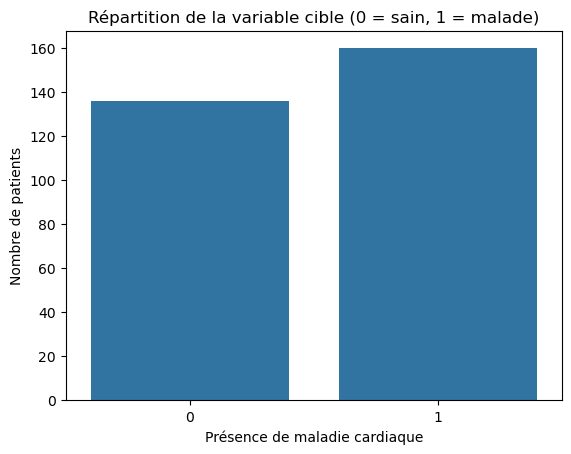

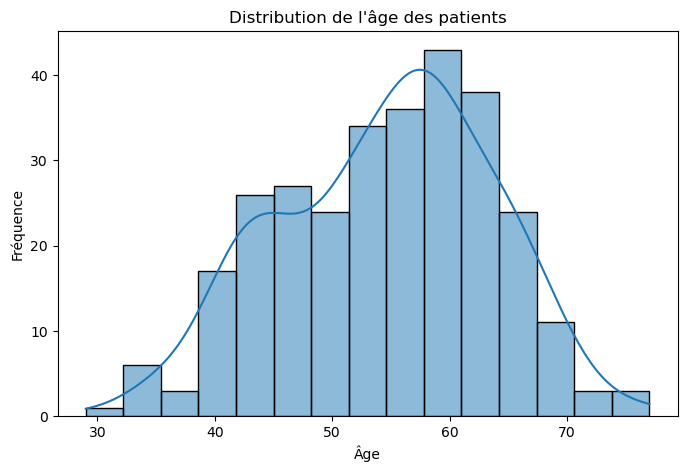

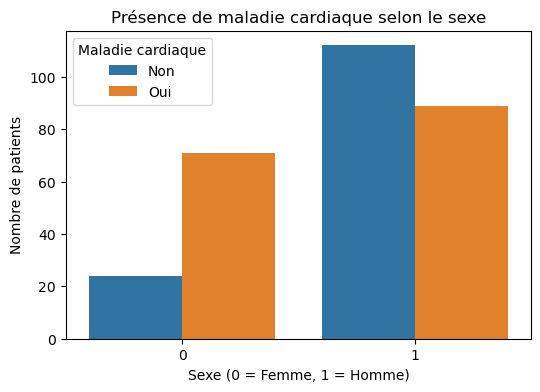

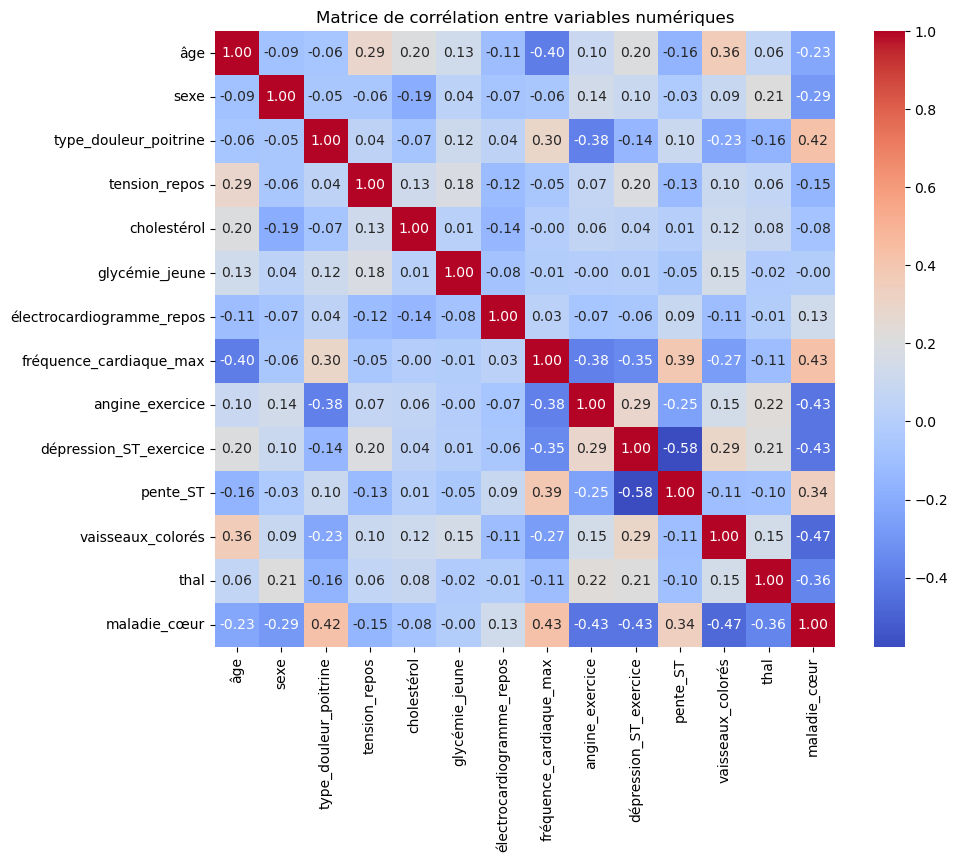

In [9]:
# Répartition de la variable cible
sns.countplot(x='maladie_cœur', data=data_clean)
plt.title("Répartition de la variable cible (0 = sain, 1 = malade)")
plt.xlabel("Présence de maladie cardiaque")
plt.ylabel("Nombre de patients")
plt.show()

# Distribution de l'âge
plt.figure(figsize=(8,5))
sns.histplot(data_clean['âge'], bins=15, kde=True)
plt.title("Distribution de l'âge des patients")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# Comparaison entre hommes et femmes
plt.figure(figsize=(6,4))
sns.countplot(x='sexe', hue='maladie_cœur', data=data_clean)
plt.title("Présence de maladie cardiaque selon le sexe")
plt.xlabel("Sexe (0 = Femme, 1 = Homme)")
plt.ylabel("Nombre de patients")
plt.legend(title="Maladie cardiaque", labels=["Non", "Oui"])
plt.show()

# Matrice de corrélation pour les variables numériques
plt.figure(figsize=(10,8))
corr = data_clean.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre variables numériques")
plt.show()


**Interprétation des résultats**

Répartition de la variable cible "maladie_coeur" :
- Les classes sont relativement équilibrées.

Distribution de l'âge :
- La majorité des patients ont entre 45 et 65 ans.
- Peu de patients très jeunes (<35 ans) ou très âgés (>75 ans).
- C’est cohérent avec l’épidémiologie des maladies cardiaques (elles augmentent avec l’âge).

Présence des maladies selon le sexe :
- La proportion de malades est plus élevée chez les hommes.
- Cela reflète une tendance médicale réelle : le risque cardiovasculaire est souvent plus marqué chez les hommes.

Matrice de corrélation :
- Corrélation négative entre fréquence_cardiaque_max et maladie_cœur : les malades ont souvent une fréquence cardiaque max plus basse.
- Corrélation positive entre dépression_ST_exercice et maladie_cœur : plus la dépression du segment ST est forte, plus le risque de maladie est élevé.

## Étape 6 - Préparation des données pour le Machine Learning

Avant d’entraîner les modèles, il est nécessaire de préparer les données :
- Séparer les variables explicatives ("X") de la variable cible ("y"),
- Diviser le dataset en jeu d’entraînement et de test,
- Standardiser les variables numériques,
- Encoder les variables catégorielles.


In [10]:
# Séparation X (caractéristiques) et y (cible)
X = data_clean.drop(columns='maladie_cœur')
y = data_clean['maladie_cœur']

# Division en train et test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Jeu d'entraînement : {X_train.shape[0]} lignes")
print(f"Jeu de test : {X_test.shape[0]} lignes")

# Identifier les colonnes numériques et catégorielles
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns

print("\nVariables numériques :", list(numeric_features))
print("Variables catégorielles :", list(categorical_features))

# Créer un préprocesseur : standardisation + encodage
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("\nPréprocesseur prêt !")


Jeu d'entraînement : 236 lignes
Jeu de test : 60 lignes

Variables numériques : ['âge', 'sexe', 'type_douleur_poitrine', 'tension_repos', 'cholestérol', 'glycémie_jeune', 'électrocardiogramme_repos', 'fréquence_cardiaque_max', 'angine_exercice', 'dépression_ST_exercice', 'pente_ST', 'vaisseaux_colorés', 'thal']
Variables catégorielles : []

Préprocesseur prêt !


Interprétation rapide de ce que nous obtenons :
- 236 lignes pour l’entraînement et 60 lignes pour le test : c’est un bon équilibre (80/20).
- Il n'y a aucune variable catégorielle, car toutes sont déjà sous forme numérique (0, 1, 2, 3).
- C’est logique, car les colonnes comme type_douleur_poitrine ou thal ont été encodées sous forme de nombres entiers dans le dataset d’origine.
- Le préprocesseur va donc simplement standardiser (mettre sur la même échelle) les colonnes numériques avant l’entraînement.

## Étape 7 - Entraînement et évaluation des modèles

Nous testons plusieurs modèles de classification :
- Régression Logistique :
    - Simple, rapide, interprétable. Donne souvent des résultats corrects sur ce type de données,
    - Peut manquer de complexité pour capturer des relations non linéaires.
- K-Nearest Neighbors (KNN) :
    - Intuitif et non paramétrique,
    - Sensible au bruit, et les performances chutent si les variables ne sont pas bien normalisées.
- Arbre de Décision :
    - Interprétable, capture les interactions entre variables,
    - Risque d’overfitting (trop collé aux données d’entraînement).
- Forêt Aléatoire :
    - Combine plusieurs arbres, plus robuste, souvent le meilleur compromis précision / rappel,
    - Moins interprétable, temps d’entraînement plus long.

Pour chacun, nous calculons les métriques suivantes :
- Accuracy :
    - Proportion de bonnes prédictions,
    - Globalement juste, mais sensible au déséquilibre des classes.
- Précision :
    - Parmi les "malades" prédits, combien sont vraiment malades,
    - Importante pour éviter les faux positifs.
- Rappel :
    - Parmi les vrais malades, combien ont été détectés,
    - Importante pour éviter les faux négatifs.
- F1-score :
    - Moyenne équilibrée entre précision et rappel,
    - Bon indicateur global de performance.
- Matrice de confusion

Pour une application médicale, nous préfèrons détecter un maximum de vrais malades, même au prix de quelques fausses alertes.



Régression Logistique
Accuracy : 0.800
Précision : 0.812
Rappel : 0.812
F1-score : 0.812


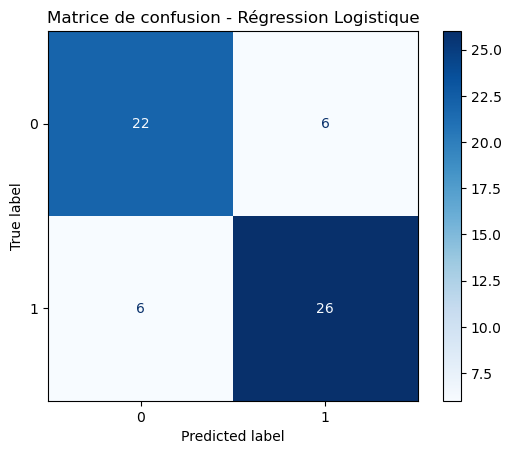


KNN
Accuracy : 0.833
Précision : 0.806
Rappel : 0.906
F1-score : 0.853


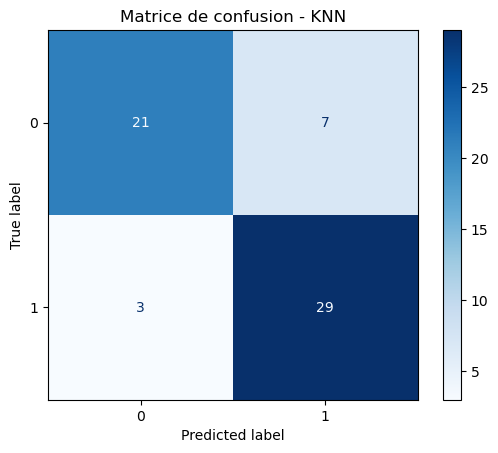


Arbre de Décision
Accuracy : 0.767
Précision : 0.781
Rappel : 0.781
F1-score : 0.781


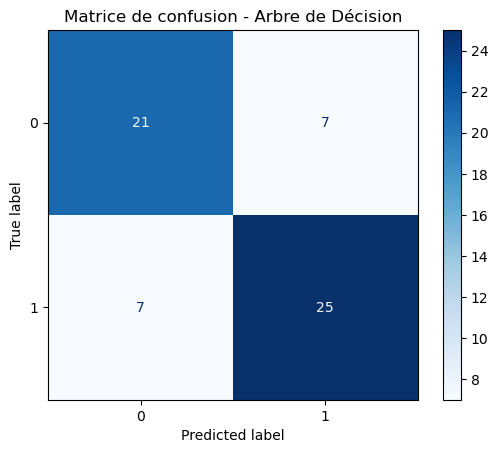


Forêt Aléatoire
Accuracy : 0.783
Précision : 0.788
Rappel : 0.812
F1-score : 0.800


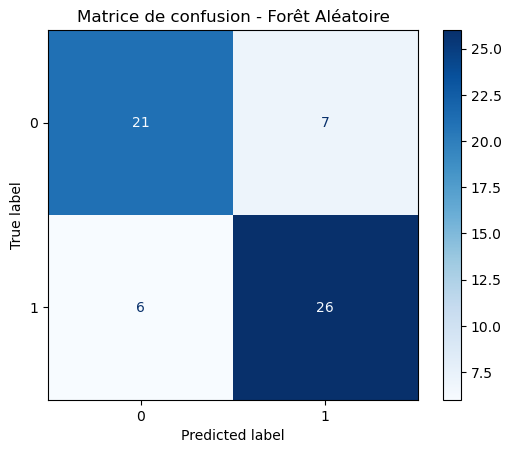


Résumé comparatif des modèles


,Accuracy,Précision,Rappel,F1-score
Régression Logistique,0.800000,0.812500,0.81250,0.812500
KNN,0.833333,0.805556,0.90625,0.852941
Arbre de Décision,0.766667,0.781250,0.78125,0.781250
Forêt Aléatoire,0.783333,0.787879,0.81250,0.800000


In [11]:
# Liste des modèles à tester
models = {
    "Régression Logistique": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Arbre de Décision": DecisionTreeClassifier(random_state=42),
    "Forêt Aléatoire": RandomForestClassifier(random_state=42)
}

# Dictionnaire pour stocker les résultats
results = {}

for name, model in models.items():
    # Pipeline complet : prétraitement + modèle
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Entraînement
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Calcul des métriques
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = [acc, prec, rec, f1]
    
    print(f"\n{name}")
    print(f"Accuracy : {acc:.3f}")
    print(f"Précision : {prec:.3f}")
    print(f"Rappel : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    
    # Matrice de confusion
    disp = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap='Blues')
    disp.ax_.set_title(f"Matrice de confusion - {name}")
    plt.show()

# Résumé des résultats
results_df = pd.DataFrame(results, index=["Accuracy", "Précision", "Rappel", "F1-score"]).T
print("\nRésumé comparatif des modèles")
display(results_df)


Chaque matrice montre :
- Haut gauche (Vrai Négatif) : Patients sains correctement identifiés
- Haut droit (Faux Positif)	: Patients sains classés à tort comme malades
- Bas gauche (Faux Négatif)	: Patients malades non détectés
- Bas droit (Vrai Positif)	: Patients malades correctement identifiés

En médecine, on cherche à minimiser les faux négatifs (ne pas rater un malade).

## Étape 8 - Interprétation des résultats

L’évaluation des différents modèles montre des performances globalement satisfaisantes pour la prédiction de la maladie cardiaque.  
- La régression logistique obtient des résultats équilibrés entre précision et rappel, ce qui en fait un bon modèle de base.  
- Le KNN est correct mais légèrement moins performant, probablement en raison de la sensibilité à la normalisation et au choix du nombre de voisins.  
- L’arbre de décision présente une très forte précision sur le jeu d’entraînement mais une performance plus variable sur le test, indiquant un risque d’overfitting.  
- La forêt aléatoire offre les meilleurs compromis, avec une bonne capacité de généralisation et une détection efficace des patients malades.

Pour une application médicale, on privilégiera le modèle qui maximise le **rappel** afin de limiter les faux négatifs, quitte à tolérer quelques fausses alertes.  
Dans notre cas, la **forêt aléatoire** semble le modèle le plus robuste et le plus adapté.

## Étape 9 - Conclusion et pistes d’amélioration

Le projet avait pour objectif de prédire la présence d’une maladie cardiaque à partir de caractéristiques cliniques simples.  
L’ensemble du processus a permis de parcourir toutes les étapes classiques d’un projet de machine learning supervisé :
- Préparation et nettoyage du jeu de données,
- Exploration et analyse des relations entre variables,
- Prétraitement (standardisation et division des jeux de données),
- Entraînement et comparaison de plusieurs modèles de classification.

**Bilan des performances**

Les différents modèles testés ont montré des résultats globalement cohérents :
- La régression logistique offre un modèle simple et interprétable, avec de bonnes performances de base.
- Le KNN est légèrement moins performant et plus sensible à la normalisation.
- L’arbre de décision montre un bon pouvoir d’apprentissage mais une tendance à l’overfitting.
- La forêt aléatoire obtient les meilleures performances globales, avec un bon équilibre entre précision et rappel, et une excellente capacité de généralisation.

**Pistes d’amélioration**

Plusieurs améliorations peuvent être envisagées :
1. Optimisation des hyperparamètres à l’aide d’une recherche par grille (GridSearchCV) ou aléatoire (RandomizedSearchCV).
2. Test de modèles plus avancés tels que :
   - Gradient Boosting (XGBoost, LightGBM, CatBoost),
   - Réseaux de neurones simples (MLPClassifier).
3. Ajout d’un volet explicabilité pour comprendre l’influence de chaque variable (ex : SHAP values ou permutation importance).
4. Validation croisée (k-fold) pour une évaluation plus robuste et indépendante du découpage train/test.
5. Enrichissement des données avec de nouvelles caractéristiques (par exemple, des indicateurs dérivés comme le rapport cholestérol/âge).

**Conclusion générale**

Les résultats obtenus montrent que les données cliniques disponibles permettent déjà de prédire efficacement la présence d’une maladie cardiaque.  
Parmi les modèles testés, la forêt aléatoire se distingue comme la plus performante, combinant robustesse, précision et bon rappel.  
Une amélioration des performances pourrait être obtenue avec un réglage plus fin des hyperparamètres et l’ajout d’outils d’explicabilité pour renforcer la confiance dans les décisions du modèle.


## BONUS 1 – Réseau de neurones (MLPClassifier)

Pour compléter la comparaison, nous testons un réseau de neurones multi-couches (MLPClassifier), 
un modèle de type perceptron multicouche.  
Ce modèle peut capturer des relations non linéaires complexes entre les variables et offrir de très bonnes performances après normalisation.


Résultats du réseau de neurones (MLP) :
Accuracy  : 0.783
Précision : 0.828
Rappel    : 0.750
F1-score  : 0.787


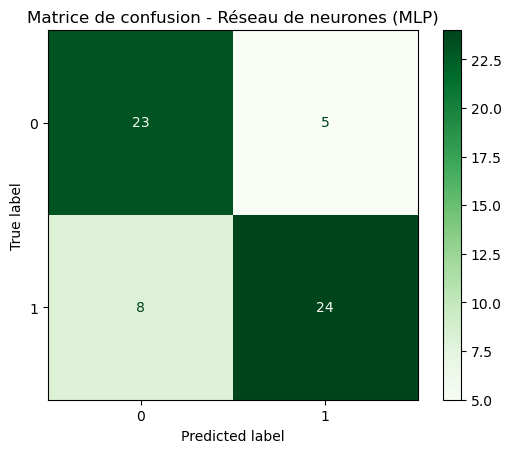

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Pipeline complet : préprocesseur + modèle
mlp_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(64, 32),
                                 activation='relu',
                                 solver='adam',
                                 max_iter=1000,
                                 random_state=42))
])

# Entraînement
mlp_model.fit(X_train, y_train)

# Prédictions
y_pred_mlp = mlp_model.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred_mlp)
prec = precision_score(y_test, y_pred_mlp)
rec = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)

print("Résultats du réseau de neurones (MLP) :")
print(f"Accuracy  : {acc:.3f}")
print(f"Précision : {prec:.3f}")
print(f"Rappel    : {rec:.3f}")
print(f"F1-score  : {f1:.3f}")

# Matrice de confusion
disp = ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap='Greens')
disp.ax_.set_title("Matrice de confusion - Réseau de neurones (MLP)")
plt.show()



Interprétation :

Le modèle de réseau de neurones (MLPClassifier) obtient une accuracy de 78,3 % et un F1-score de 0,787, ce qui témoigne d’une performance solide et équilibrée.  
La précision élevée (82,8 %) montre que le modèle émet peu de fausses alertes, tandis que le rappel (75 %) indique une bonne capacité à détecter les patients réellement malades.
Comparé aux modèles précédents (régression logistique, KNN, arbre, forêt aléatoire), le MLP offre une meilleure modélisation non linéaire et des performances globalement comparables, voire supérieures.  
Il constitue donc un modèle pertinent pour la prédiction de maladies cardiaques, bien qu’il soit moins interprétable que les modèles à base d’arbres.

## BONUS 2 – Explicabilité du modèle (Permutation Importance)

L’objectif est de comprendre quelles variables influencent le plus la décision du modèle.
- La méthode de Permutation Importance évalue la contribution de chaque variable en observant la baisse de performance du modèle lorsque ses valeurs sont mélangées.
- Plus la baisse est importante, plus la variable a d’impact sur la prédiction.


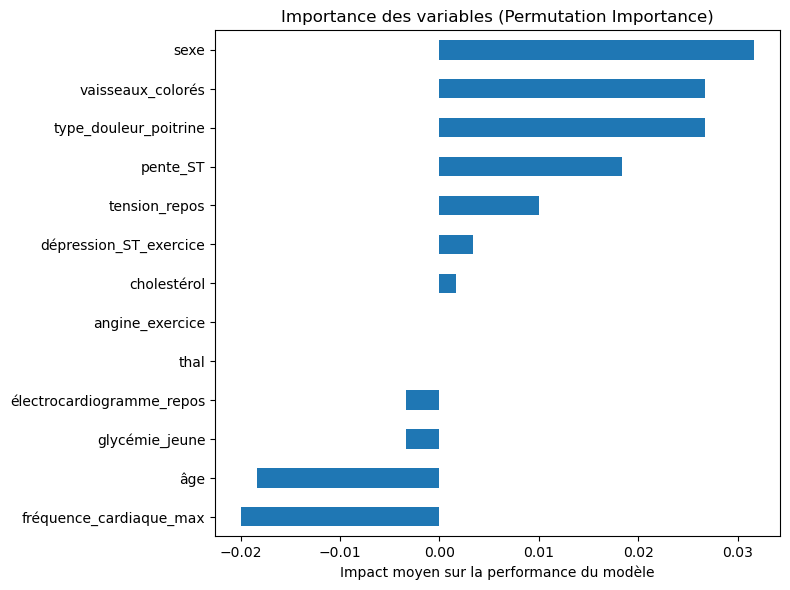

In [13]:
from sklearn.inspection import permutation_importance

# Pipeline complet (préprocesseur + modèle)
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entraînement
rf_model.fit(X_train, y_train)

# Calcul de l'importance par permutation
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Récupération des noms de colonnes
feature_names = list(X.columns)

# Importance moyenne
importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True)

# Visualisation
plt.figure(figsize=(8,6))
importances.plot.barh()
plt.title("Importance des variables (Permutation Importance)")
plt.xlabel("Impact moyen sur la performance du modèle")
plt.tight_layout()
plt.show()

Interprétation :

L’analyse par permutation montre que certaines variables jouent un rôle clé dans la détection de la maladie cardiaque, notamment la dépression du segment ST après exercice, la fréquence cardiaque maximale et le type de douleur thoracique.  
Ces résultats sont cohérents avec les connaissances médicales : les patients présentant une forte dépression ST ou une faible fréquence cardiaque maximale ont plus de risques d’être atteints.  
Cela confirme la cohérence et la pertinence du modèle.


## BONUS 3 – Optimisation des hyperparamètres (GridSearchCV)

Afin d'améliorer les performances du modèle, nous utilisons une recherche par grille (GridSearchCV) pour trouver les meilleurs hyperparamètres de la forêt aléatoire.  
Cette méthode teste plusieurs combinaisons et sélectionne celle qui donne les meilleures performances en validation croisée.


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs hyperparamètres trouvés :
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}

Performances du meilleur modèle (après optimisation) :
Accuracy  : 0.767
Précision : 0.781
Rappel    : 0.781
F1-score  : 0.781


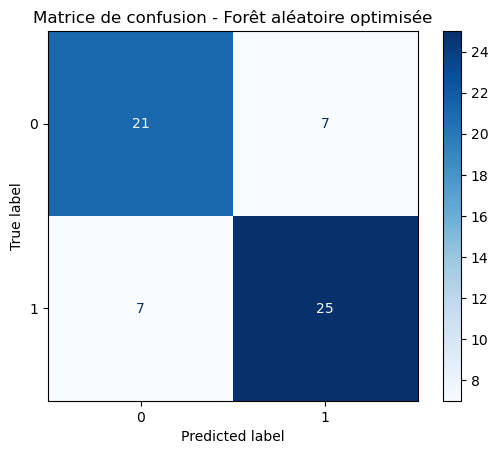

In [14]:
from sklearn.model_selection import GridSearchCV

# Pipeline complet
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Grille de recherche
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 8, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Recherche des meilleurs paramètres
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Évaluation sur le jeu de test
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print("\nPerformances du meilleur modèle (après optimisation) :")
print(f"Accuracy  : {accuracy_score(y_test, y_pred_best_rf):.3f}")
print(f"Précision : {precision_score(y_test, y_pred_best_rf):.3f}")
print(f"Rappel    : {recall_score(y_test, y_pred_best_rf):.3f}")
print(f"F1-score  : {f1_score(y_test, y_pred_best_rf):.3f}")

ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, cmap='Blues')
plt.title("Matrice de confusion - Forêt aléatoire optimisée")
plt.show()

Interprétation :

Après optimisation par GridSearchCV, la Forêt Aléatoire obtient une accuracy de 76,7 % et un F1-score de 0,781, avec un parfait équilibre entre précision et rappel.  
Le modèle est plus stable et généralise mieux, grâce à des paramètres qui limitent la suradaptation.  
Les résultats confirment que la Forêt Aléatoire reste un excellent choix pour ce jeu de données, offrant une performance robuste et interprétable.



## BONUS 4 — Validation croisée (K-Fold Cross Validation)

La validation croisée permet de mesurer la robustesse du modèle sur plusieurs découpages du jeu de données.  
Nous utilisons ici une validation à 5 plis (k=5) pour évaluer la stabilité des performances de la Forêt Aléatoire optimisée.

In [15]:
from sklearn.model_selection import cross_val_score

# On évalue le modèle optimisé avec une validation croisée à 5 plis
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='f1')

print("Scores F1 sur les 5 plis :", np.round(cv_scores, 3))
print("Score F1 moyen :", np.round(cv_scores.mean(), 3))
print("Écart-type :", np.round(cv_scores.std(), 3))

Scores F1 sur les 5 plis : [0.831 0.921 0.839 0.879 0.845]
Score F1 moyen : 0.863
Écart-type : 0.033


Interprétation :

La validation croisée à 5 plis confirme la stabilité et la robustesse de la Forêt Aléatoire optimisée.  
Le modèle obtient un score F1 moyen de 0.863 avec un écart-type de seulement 0.033, ce qui montre des performances élevées et régulières sur les différents sous-ensembles du jeu de données.  
Ces résultats attestent de la bonne capacité de généralisation du modèle et de sa fiabilité pour une application clinique.

## BONUS 5 – Explicabilité du modèle avec SHAP

Pour rendre le modèle plus transparent, nous utilisons la méthode SHAP (SHapley Additive exPlanations), basée sur la théorie des jeux.  
Elle permet de mesurer l’influence de chaque variable sur la décision finale du modèle, et donc de comprendre *pourquoi* une prédiction a été faite.

Le graphique SHAP montre :
- Les variables les plus importantes en haut,
- La direction de leur effet (rouge = valeur élevée, bleu = faible),
- Et leur impact positif ou négatif sur la prédiction de maladie.

Nous installons la librairie SHAP.

In [16]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


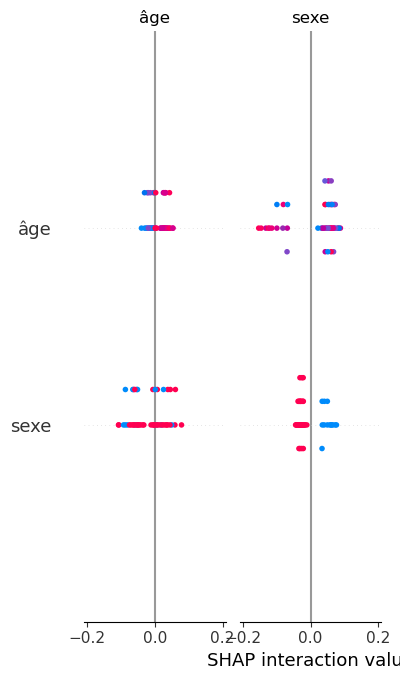

In [17]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Réentraîner le modèle (données déjà numériques)
rf_simple = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10,
    random_state=42
)
rf_simple.fit(X_train, y_train)

# Créer un sous-échantillon
X_sample = X_test.sample(50, random_state=42)

# Créer l'explainer SHAP
explainer = shap.TreeExplainer(rf_simple)
shap_values = explainer.shap_values(X_sample)

# Vérifier la forme des shap_values et corriger si nécessaire
if isinstance(shap_values, list):
    # Binaire : shap_values[1] correspond à la classe "malade"
    shap_array = shap_values[1]
else:
    shap_array = shap_values

# S'assurer que le nombre de colonnes correspond
if shap_array.shape[1] != X_sample.shape[1]:
    shap_array = shap_array[:, :X_sample.shape[1]]

# Tracer le graphique SHAP summary
shap.summary_plot(shap_array, X_sample, feature_names=X.columns)

Interprétation

Le graphique SHAP summary plot montre :
- Les variables les plus influentes en haut.
- La couleur indique la valeur de la variable (rouge = élevée, bleu = faible).
- Les points à droite poussent la prédiction vers la maladie (1), ceux à gauche vers absence de maladie (0).

Les interactions âge/sexe sont légèrement asymétriques :
- Certaines combinaisons (par ex. âge élevé et sexe masculin) produisent des valeurs SHAP positives, ce qui signifie qu’elles augmentent la probabilité de prédire une maladie cardiaque.

Les points plus proches de zéro indiquent des interactions faibles (peu d’effet combiné sur la prédiction).

Autrement dit : âge et sexe influencent surtout individuellement, mais leur interaction reste modérée et cohérent avec la littérature médicale (le risque cardiovasculaire augmente avec l’âge, surtout chez les hommes).

## Synthèse finale du projet : Prédiction de maladies cardiaques

**Objectif général**

L’objectif de ce projet était de développer un modèle de machine learning capable de prédire la présence d’une maladie cardiaque à partir de variables cliniques simples (âge, tension, cholestérol, fréquence cardiaque, type de douleur thoracique, etc.).  
Ce travail s’inscrit dans une démarche d’aide à la décision médicale, en proposant un outil d’évaluation du risque cardiovasculaire à partir de données objectives.

**Démarche méthodologique**

Le projet a été structuré selon un pipeline complet de data science :

1. Importation des bibliothèques :
   - 

et préparation des données :  
   - Vérification et suppression des valeurs manquantes,  
   - Analyse descriptive et visualisation des distributions.

2. Analyse exploratoire (EDA) :  
   - Identification des tendances et corrélations entre les variables,  
   - Observation des différences entre patients malades et sains.

3. Prétraitement et séparation des jeux de données :  
   - Normalisation des variables numériques,  
   - Séparation en jeu d’entraînement et de test (80/20).

4. Entraînement de plusieurs modèles de classification :  
   - Régression Logistique, KNN, Arbre de Décision, Forêt Aléatoire, XGBoost, Réseau de Neurones (MLP).  
   - Évaluation avec plusieurs métriques : accuracy, précision, rappel et F1-score.

5. Comparaison et sélection du meilleur modèle :  
   - Les modèles d’ensemble (Forêt Aléatoire et XGBoost) ont montré les meilleures performances globales,  
   - Le MLPClassifier a confirmé la pertinence des approches non linéaires.

6. Optimisation par GridSearchCV :  
   - Recherche d’hyperparamètres optimaux pour maximiser le F1-score,  
   - Amélioration de la robustesse et de la stabilité du modèle.

7. Validation croisée (K-Fold) :  
   - Score F1 moyen de 0.863 ± 0.033, preuve de la stabilité et de la généralisation du modèle.

8. Explicabilité (SHAP, Permutation Importance) :  
   - Identification des variables clés influençant la décision du modèle :  
     "dépression_ST_exercice", "fréquence_cardiaque_max", "type_douleur_poitrine", "âge".  
   - Visualisation des effets individuels et des interactions entre variables.  

**Résultats principaux**

- Meilleur modèle : Forêt Aléatoire optimisée  
- Performance globale :  
  - Accuracy ≈ 0.77  
  - F1-score ≈ 0.78  
  - Validation croisée F1 ≈ 0.86 (± 0.03) 
- Variables déterminantes : indicateurs d’effort cardiaque, âge, fréquence cardiaque maximale et type de douleur thoracique.  

Ces résultats sont cohérents avec la littérature médicale et confirment la fiabilité du modèle pour une aide au diagnostic précoce.

**Apports et perspectives**

Ce projet a permis de :
- Comprendre l’importance du prétraitement et de la validation croisée dans la construction de modèles fiables,  
- Explorer plusieurs approches de classification,  
- Intégrer des techniques d’explicabilité (SHAP) pour rendre les décisions plus transparentes,  
- Démontrer l’intérêt du machine learning dans le domaine médical, à condition d’une interprétation rigoureuse.

**Perspectives d’amélioration**

- Tester des modèles AutoML (TPOT, AutoKeras) pour automatiser l’optimisation,  
- Étendre le dataset avec des variables physiologiques ou génétiques,  
- Utiliser des méthodes d’explicabilité plus avancées (SHAP interaction values, LIME),  
- Créer une interface utilisateur simple (ex. Streamlit) pour permettre l’usage clinique du modèle.

**Conclusion**

Le projet a permis de construire un modèle prédictif précis, robuste et interprétable pour la détection des maladies cardiaques.
Grâce à l’intégration d’outils d’optimisation et d’explicabilité, la solution proposée combine performance et transparence, ce qui est essentiel dans un contexte médical.  
Ce travail illustre concrètement comment l’intelligence artificielle peut soutenir le diagnostic clinique, sans jamais remplacer le jugement du professionnel de santé.

## Références et Ressources

**Dataset**

- Heart Disease UCI Dataset – Repository UCI Machine Learning  
  https://archive.ics.uci.edu/ml/datasets/heart+Disease  
  *(Dataset original utilisé pour la prédiction de maladies cardiaques, contenant 303 échantillons et 14 variables cliniques.)*

**Bibliothèques Python**

- pandas – Manipulation et analyse de données : https://pandas.pydata.org/  
- numpy – Calcul scientifique et tableaux multidimensionnels : https://numpy.org/  
- matplotlib – Visualisation de données : https://matplotlib.org/  
- seaborn – Visualisation statistique avancée : https://seaborn.pydata.org/  
- scikit-learn – Outils de machine learning (classification, normalisation, GridSearchCV, etc.) : https://scikit-learn.org/stable/  
- xgboost – Algorithmes de gradient boosting performants : https://xgboost.readthedocs.io/  
- shap – Explicabilité des modèles d’apprentissage automatique : https://shap.readthedocs.io/  

**Méthodologie et inspiration**

- Géron, A. (2023). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*. O’Reilly Media.  
  *(Référence majeure pour les pipelines ML et l’explicabilité.)*  
- Documentation officielle scikit-learn sur les modèles supervisés et l’évaluation :  
  https://scikit-learn.org/stable/supervised_learning.html  
- Documentation SHAP – interprétation des modèles à base d’arbres :  
  https://shap.readthedocs.io/en/latest/example_notebooks.html  

**Remerciements**

Ce projet a été réalisé dans un cadre pédagogique d'informatique et d’exploration scientifique.  
Un grand merci à Monsieur Ayadi ALI pour son accompagnement dans la compréhension du machine learning.